# THE HEART DISEASE DECISION TREE MODEL

---

## Importing basic Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the datasets

In [22]:
df = pd.read_csv("processed.cleveland.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [23]:
df.columns = ['age',
              'sex',
              'cp',
              'resp' ,
              'chol' , 
              'fbs' ,
              'restecg' ,
              'thalach' ,
              'exang' ,
              'oldpeak' ,
              'slope' ,
              'ca' ,
              'thal' ,
              'hd']
df.head()
              

,age,sex,cp,resp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Missing Data Part 1 : Identifying Missing Data

In [24]:
df.dtypes

age        float64
sex        float64
cp         float64
resp       float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

 Almost all are float64, however, two columns **ca** and **thal** have obect type and one column **hd** has int64

In [25]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

*ca* is the number of major vessels (0-3) colored by *flourosopy* and **'?'** represents **Missing Values** .

In [26]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

Also *thal* also contains a mixture of numbers representing the different stages of diagnoses from the thallium heart scan and **'?'** represents the **Missing Values** .

# Missing Data Part 2: Dealing With Missing Data

Since Classification Trees do not support datasets with missing values, we need to figure out to deal with the '?'s .

In [27]:
# Here, I am printing the number of Rows thet contain missing values.
len( df.loc[(df['ca']=='?') | (df['thal']=='?')])

6

So there are only six rows with improper entries. lets look st them!

In [28]:
df.loc[ (df['ca']=='?') | (df['thal']=='?') ]

,age,sex,cp,resp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [29]:
len(df)

303

So 6 out of 303 rows, or 2%, contains missing data. Since **303-6** that is **297** is plenty of data for the trees, I am going to drop them instead of imputing them!

In [30]:
df_no_missing = df.loc[ (df['ca']!='?')
                        &
                        (df['thal']!='?')]

In [31]:
len(df_no_missing)

297

# Format Data Part 1: Split the Data into Dependent and Independent Variables

In [32]:
X = df_no_missing.drop('hd' , axis=1).copy()
X.head()

,age,sex,cp,resp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [33]:
y=df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# Format the Data Part 2: One-Hot Encodiong

- **age**: **Float**

- **sex**: **Category**
  - 0 = female  
  - 1 = male  

- **cp** (chest pain): **Category**
  - 1 = typical angina  
  - 2 = atypical angina  
  - 3 = non-anginal pain  
  - 4 = asymptomatic  

- **restbp**: resting blood pressure (in mm Hg), **Float**

- **chol**: serum cholesterol in mg/dl, **Float**

- **fbs** (fasting blood sugar): **Category**
  - 0 = ≥ 120 mg/dl  
  - 1 = < 120 mg/dl  

- **restecg** (resting electrocardiographic results): **Category**
  - 1 = normal  
  - 2 = having ST-T wave abnormality  
  - 3 = showing probable or definite left ventricular hypertrophy  

- **thalach**: maximum heart rate achieved, **Float**

- **exang** (exercise-induced angina): **Category**
  - 0 = no  
  - 1 = yes  

- **oldpeak**: ST depression induced by exercise relative to rest, **Float**

- **slope**: the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping  
  - 2 = flat  
  - 3 = downsloping  

- **ca**: number of major vessels (0-3) colored by fluoroscopy, **Float**

- **thal**: thalium heart scan, **Category**
  - 3 = normal (no cold spots)  
  - 6 = fixed defect (cold spots during rest and exercise)  
  - 7 = reversible defect (when cold spots only appear during exercise)  
ta right now.

In [34]:
X.dtypes

age        float64
sex        float64
cp         float64
resp       float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In order to use categorical data with scikit learn Decision Trees, we have to use a trick that converts a categorical data into multiple columns of binary values. This trick is called One Hot Encoding

In [35]:
pd.get_dummies(X,columns=['cp'],dtype=int).head()

,age,sex,resp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [36]:
 X_encoded = pd.get_dummies(X,columns=['cp' , 'restecg' , 'slope' , 'thal'] , dtype=int)
X_encoded.head()

,age,sex,resp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [37]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

### In this classification I am going to care only about if the person carries a heart disease or not. So to make it sure, I am changing the y values accordingly!

In [38]:
y[y>0] = 1
y.unique()

array([0, 1], dtype=int64)

# Preliminary Classification tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_encoded , y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train,y_train)


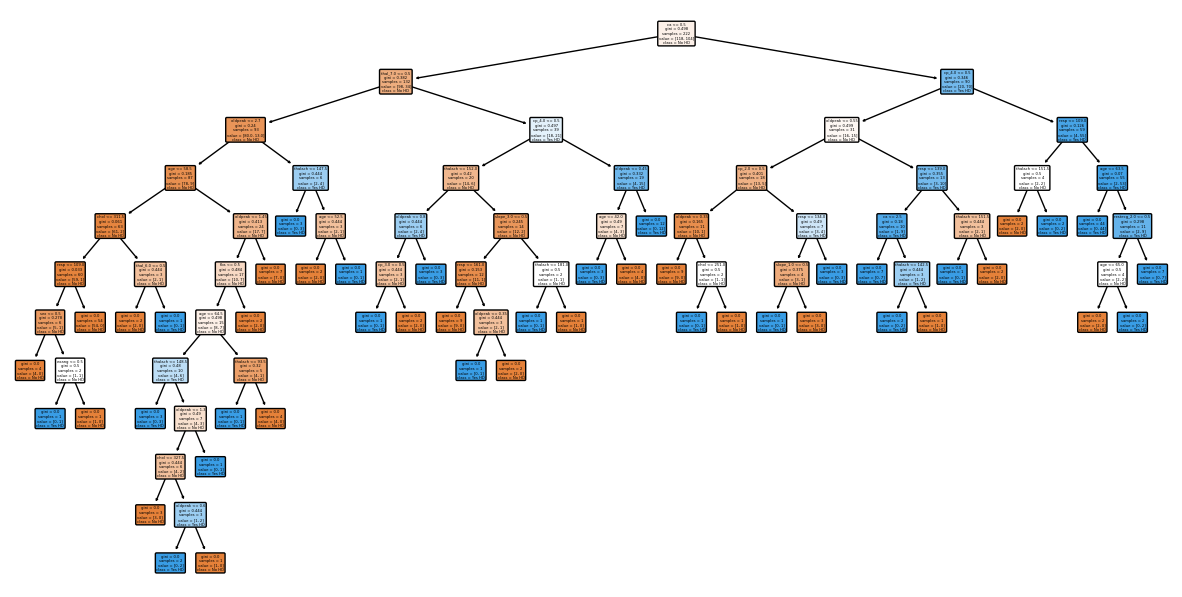

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15 , 7.5))
plot_tree(clf_dt , filled=True, rounded=True , class_names =["No HD" , "Yes HD"], feature_names = X_encoded.columns);

We have built the **Decision Tree** for classification. Let's see how it performs on *testing Dataset* .

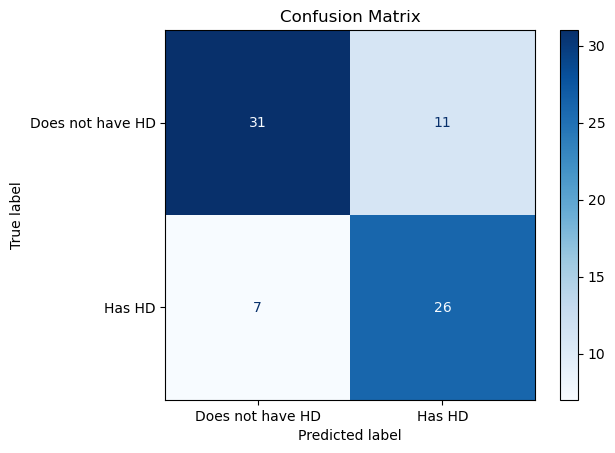

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf_dt.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In the confusion matrix, we see that of the **31 +11 = 42** people that did not have Heart Disease, **31 (74%) were correctly classified**. And of the **7+26 = 33** people that have Heart Disease, **26 (79%) were correctly classified**. Can we do better? One thing that might be holding this Classification Tree back is that it may have **overfit the training dataset**. So let's **prune** the tree. Pruning, in theory, should solve the overfitting problem and give us better results

# Cost Complexity Pruning Part 1 : Visualize alpha

Pruning a decision tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values. We'll do this for both the **Training Dataset** and the **Testing Dataset**.

First, let's extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha. **NOTE**: We omit the maximum value for alpha with ccp_alphas = ccp_alphas [:-1] because it would prune all leaves, leaving us with only a root instead of a tree.

In [57]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1] 
clf_dts = [] 
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

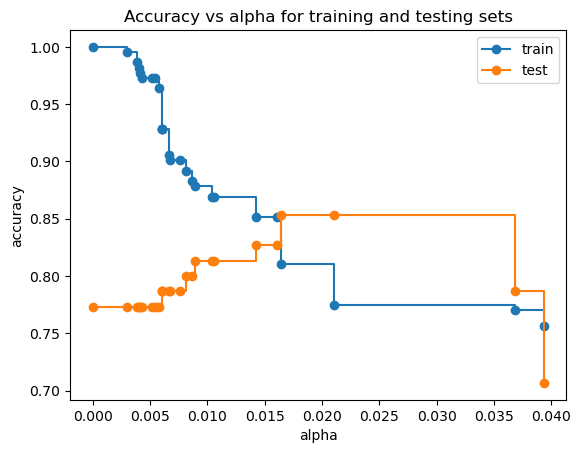

In [58]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In the graph above, I see that the accuracy for the **Testing Dataset hits its maximum value when alpha is about 0.016**. After this value for alpha,the accuracy of the Training Dataset drops off and that suggests I should set **ccp_alpha=0.016**

**NOTE:** When I apply **Cost Complexity Pruning** to a **Classification Tree**, values for alpha go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for alpha for a **Regression** Tree can be much larger since the sum of squared residuals can, in theory, go from 0 to positive infinity.

Since there are many ways I could have divided the original dataset into Training and Testing datasets, **how do we know we used the best Training Dataset and how do we know we used the best Testing Dataset?** we answer this question with **10-Fold Cross Validation**. So that's what I am going to do now, and I'll do it with the cross_val_score() function.

# Cost Complexity Pruning Part 2: Cross Validation For Finding Best Alpha

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set ccp_alpha=0.016. We will do this by using the cross_val_score() function to generate different training and testing datasets and then train and test the tree with those datasets.

<Axes: xlabel='tree'>

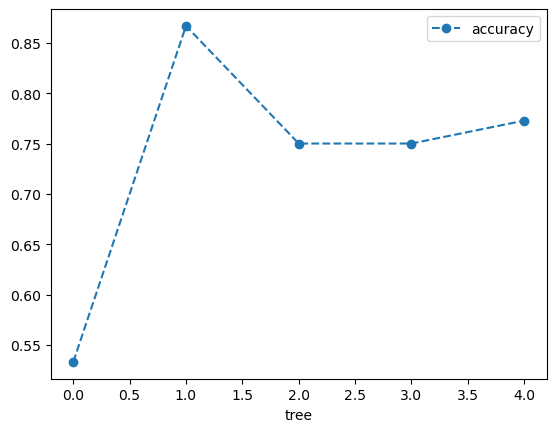

In [59]:
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # defines a tree
scores = cross_val_score(clf_dt, X_train, y_train, cv=5) # performs cv on tree i just defined and on the X_train and y_train
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})# creates a table with tree anf accuracy cols 
df.plot(x='tree', y='accuracy', marker='o', linestyle='--') # plots the table

The graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies, suggesting that **alpha is sensitive to the datasets**. So, instead of picking a single Training dataset and single Testing dataset, **let's use cross validation to find the optimal value for ccp_alpha.**

<Axes: xlabel='alpha'>

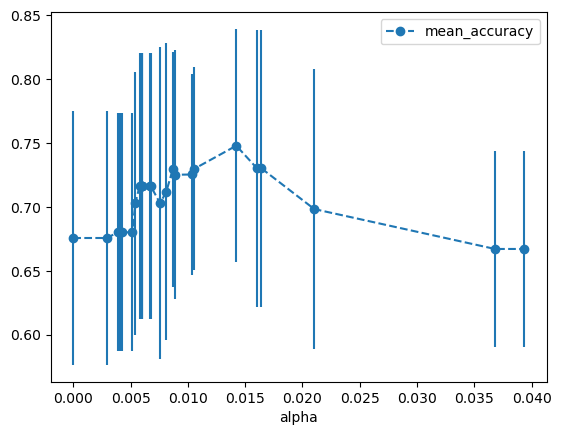

In [60]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

Using CV we see that instead of 0.016 , something closer to **0.014** works much better!

In [61]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] >0.014) & (alpha_results['alpha'] < 0.015)]['alpha']

In [62]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

C:\Users\Arnav Mehta\AppData\Local\Temp\ipykernel_23332\4011548369.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha = float(ideal_ccp_alpha)


0.014224751066856332

So our final Value for alpha is : **0.014224751066856332***

# Building the Final Classification Tree

In [63]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

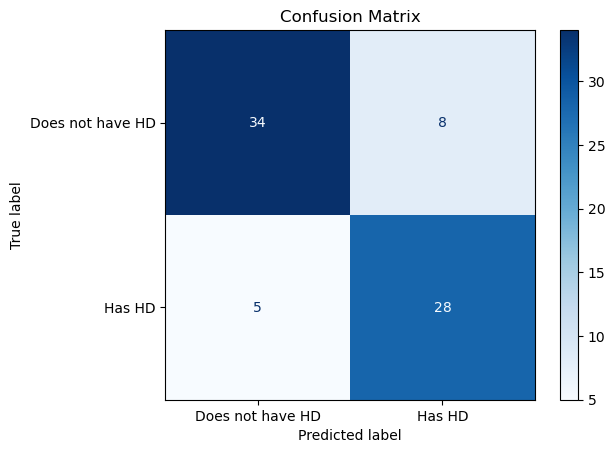

In [67]:
cm = confusion_matrix(y_test, clf_dt_pruned.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show() 

The pruned tree is better at classifying patients than the full sized tree.
Of the **34+8= 42** people that did not have heart disease, **34 (81%) were correctly classified**.
This is an improvement over the full sized tree, which only correctly classified 31 (74%) of the patients without heart disease. 
Of the **5+ 28 = 33** people with heart disease, **28 (85%) were correctly classified**. 
Again, this is an improvement over the full sized tree, which only correctly classified 26 (79%) of the patients with heart disease.

The last thing we are going to do is draw the pruned tree and discuss how to interpret it.

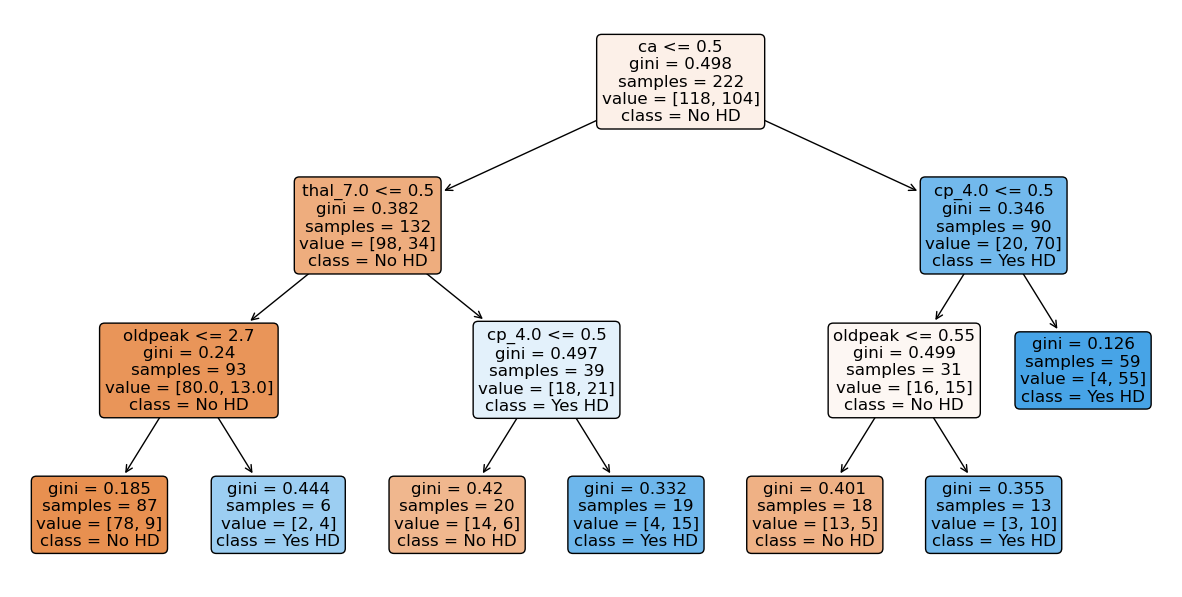

In [68]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, filled=True , rounded=True , class_names = ["No HD" , "Yes HD"], feature_names=X_encoded.columns);

Now let's discuss how to interpret the tree. 
In each node, we have:
- The variable (column name) and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split the observations. All observations with **ca => 0.5** go to the **left** and all observations with **ca > 0.5** go to the **right**.
- **gini** is the gini index or score for that node
- **samples** tell us how many samples are in that node
- **value** tells us how many samples in the node are in each category. In this example, we have two categories, No and Yes, referring to whether or not a patient has heart disease. The number of patients with No comes first because the categories are in alphabetical order. Thus, in the root, 118 patients have No and 104 patients have Yes.
- **class** tells us whichever category is represented most in the node. In the root, since 118 people have No and only 104 people have Yes, class is set to No.


The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.
Lastly, the nodes and leaves are colored by the **class**. In this case **No** is different shades of orange-ish and **Yes** is different shades of blue. The the darker the shade, the lower the **gini** score, and that tells us how much the node or leaf is skewed towards one class.

# CONCLUSION

### Conclusion

In this project, we utilized a Decision Tree (DT) classifier to predict the likelihood of heart disease based on patient data. By analyzing key features such as age, cholesterol levels, resting blood pressure, and more, the model effectively classified individuals into categories of **"Has Heart Disease"** and **"Does Not Have Heart Disease"**.

To enhance model performance and avoid overfitting, we applied **cost-complexity pruning** (using `ccp_alpha`). This pruning step significantly improved the model's generalizability by simplifying the tree structure without sacrificing predictive accuracy. **Cross-validation** was employed to identify the optimal pruning parameter, ensuring that the balance between model complexity and accuracy was maintained.

The final pruned Decision Tree demonstrated a **strong ability to distinguish between patients with and without heart disease**, as evidenced by its accuracy and performance metrics. The **confusion matrix analysis** highlighted the model's effectiveness, showcasing its potential for practical applications in medical diagnostics.

*This project highlights the power of machine learning, particularly Decision Tree algorithms, in addressing critical health challenges. With appropriate preprocessing, feature selection, and model optimization, machine learning can serve as a valuable tool for early diagnosis and medical decision support.*